In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['figure.dpi'] = 300

In [5]:
df = pd.read_csv("../../results/qc.csv")

In [7]:
df

,run,coverage,f_keep,f_contam,f_unmapped
0,ERR1034716,541.802501,0.995619,0.001674,0.002706
1,ERR1034721,629.066070,0.996452,0.000818,0.002730
2,ERR1034723,351.830399,0.996164,0.000944,0.002892
3,ERR1034725,464.375495,0.995185,0.000909,0.003906
4,ERR1034726,363.654382,0.995493,0.000954,0.003554
...,...,...,...,...,...
8316,SRR7131198,78.389714,0.999267,0.000733,0.000000
8317,SRR7131195,48.861822,0.992454,0.007546,0.000000
8318,SRR7131196,129.605503,0.999263,0.000737,0.000000
8319,SRR12882607,141.705874,0.993245,0.003336,0.003419


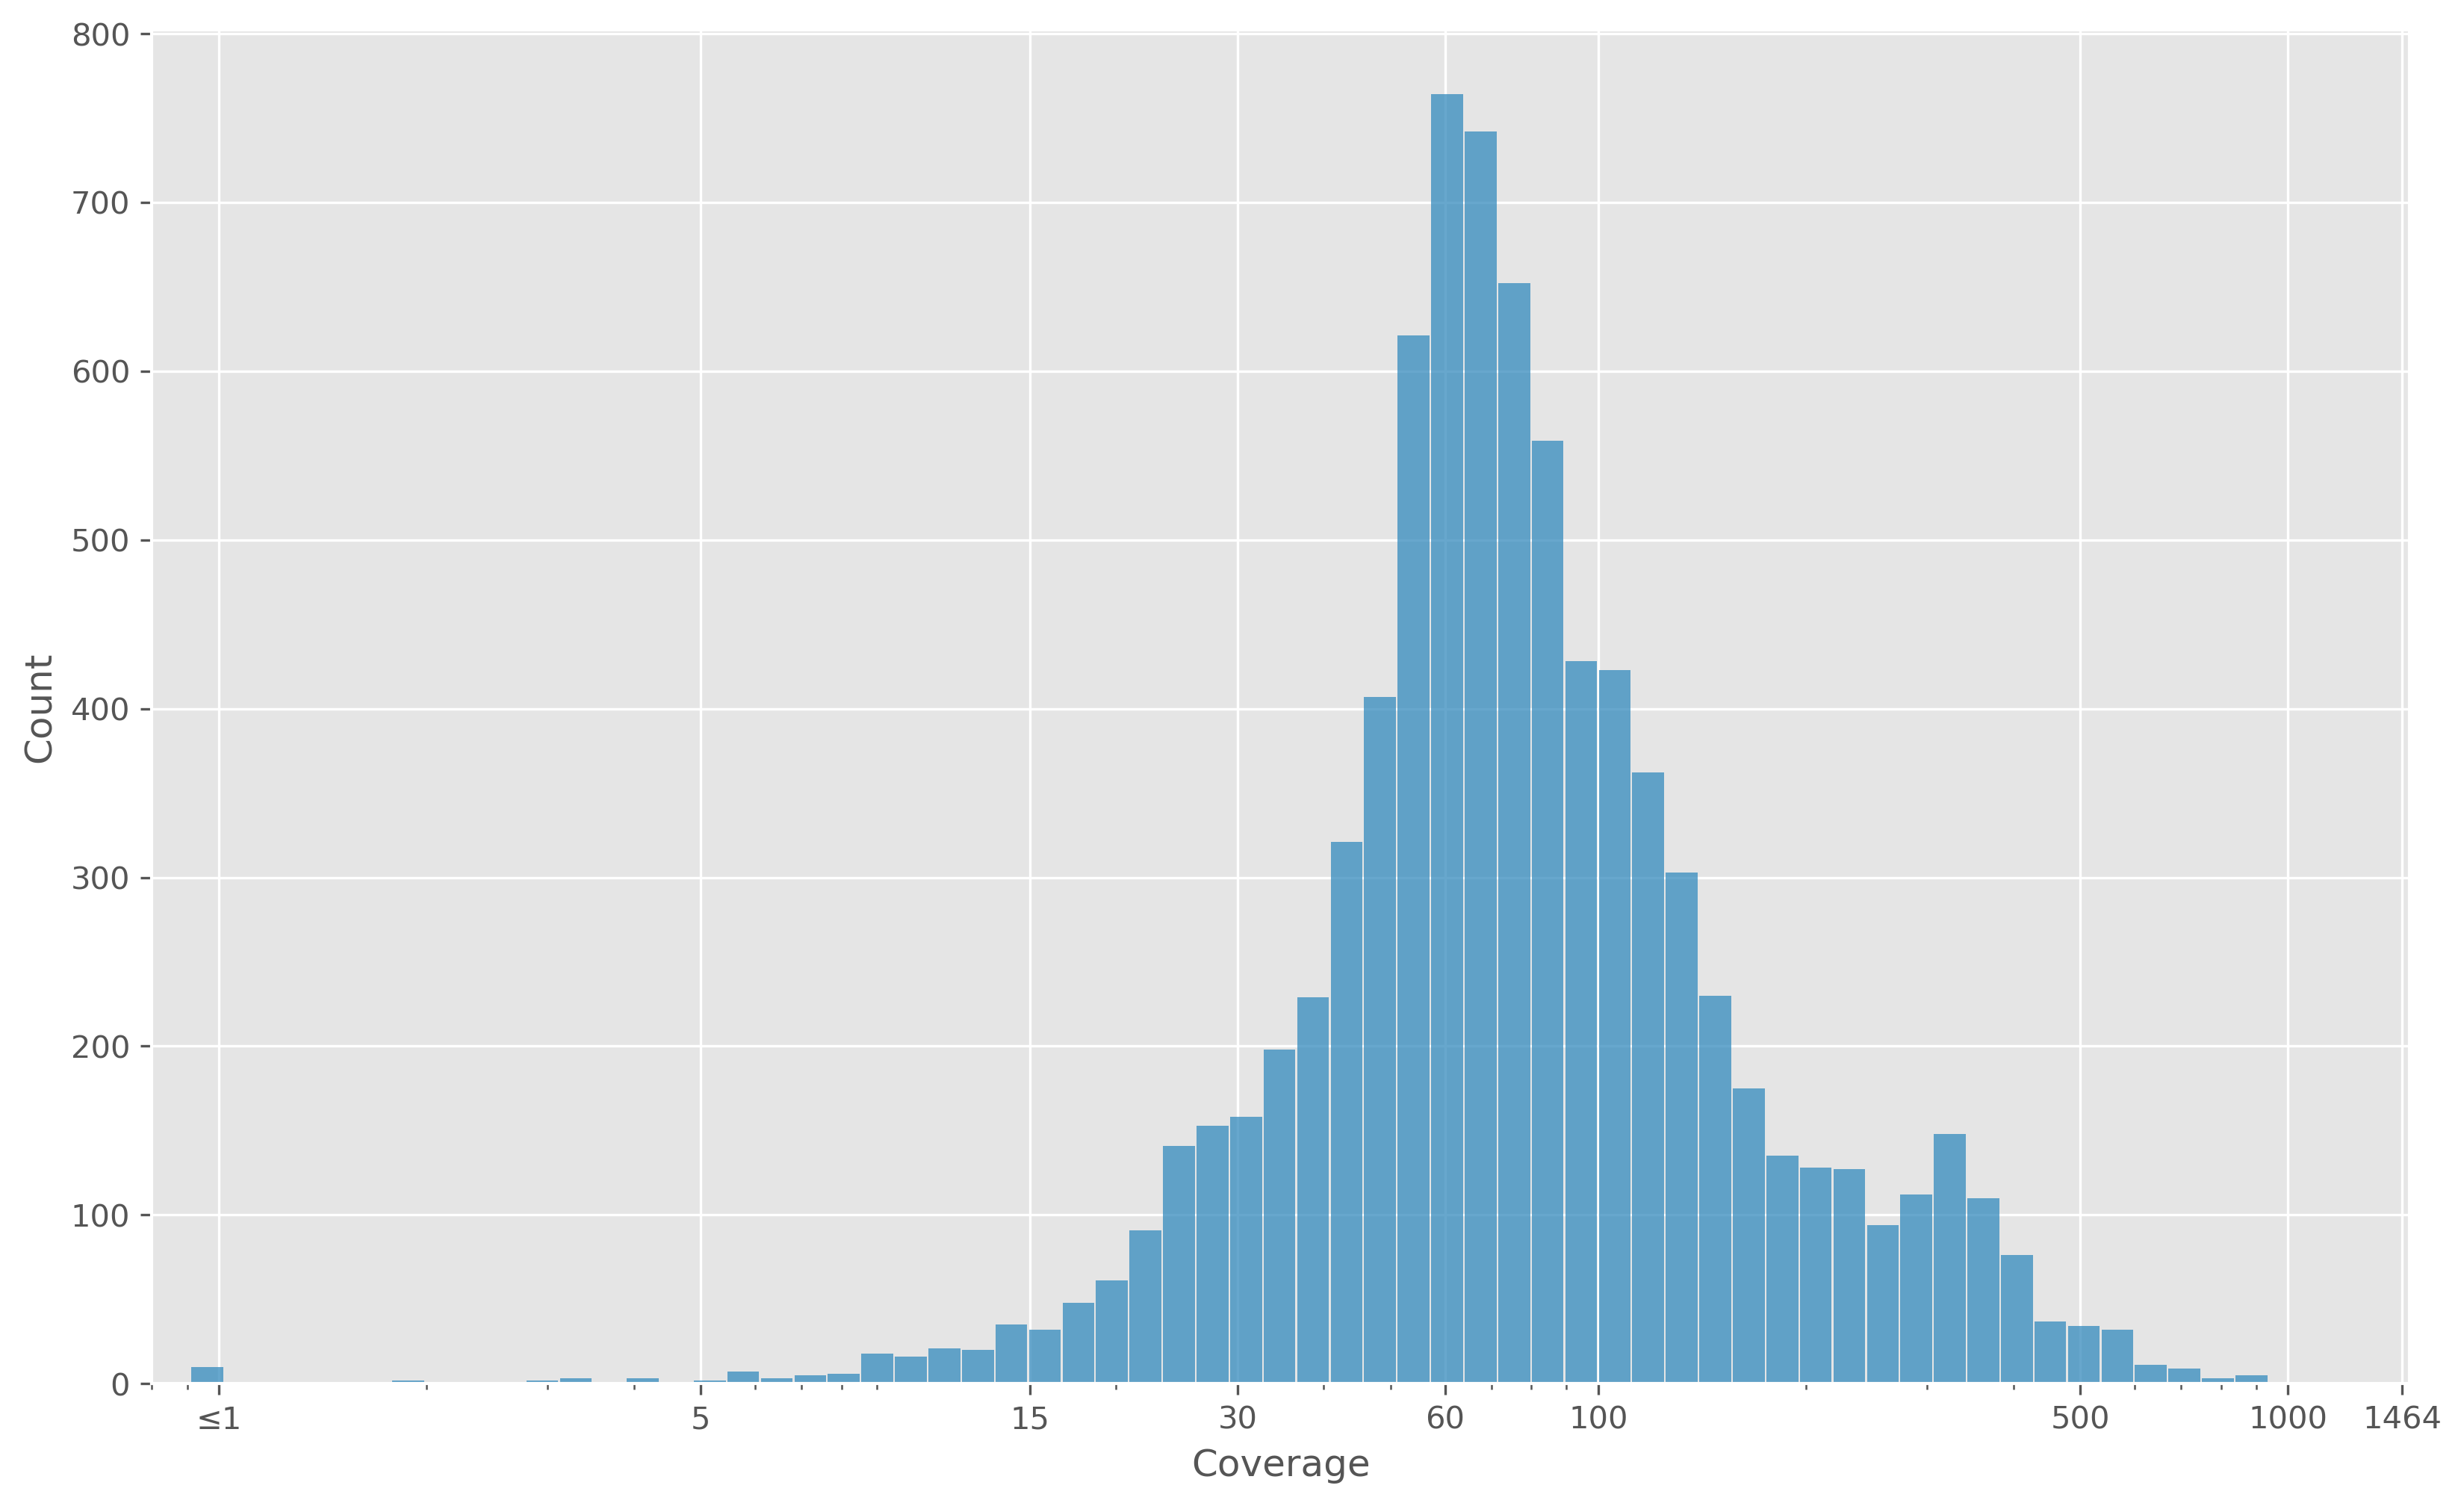

In [53]:
xs = [x if x>0 else 1 for x in df["coverage"]]

hist, bins, _ = ax.hist(xs, bins=100)
fig, ax = plt.subplots()
# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax = sns.histplot(xs, bins=logbins, shrink=0.95)
ax.set_xscale('log')
ticks = [1, 5, 15, 30, 60, 100, 500, 1000, int(df["coverage"].max())]
ax.set_xticks(ticks)
ticks[0] = "≤1"
ax.set_xticklabels(ticks)
ax.set_xlim((0.8, 1500))
_ = ax.set(xlabel="Coverage")

In [55]:
covg_threshold = 15
pass_cov = [x for x in xs if x >= covg_threshold]
print(f"{len(pass_cov)/len(xs):.2%} ({len(pass_cov)}/{len(xs)}) of isolates have coverage {covg_threshold} or greater")

98.07% (8160/8321) of isolates have coverage 15 or greater


Text(0.5, 0, 'Fraction of MTBC reads')

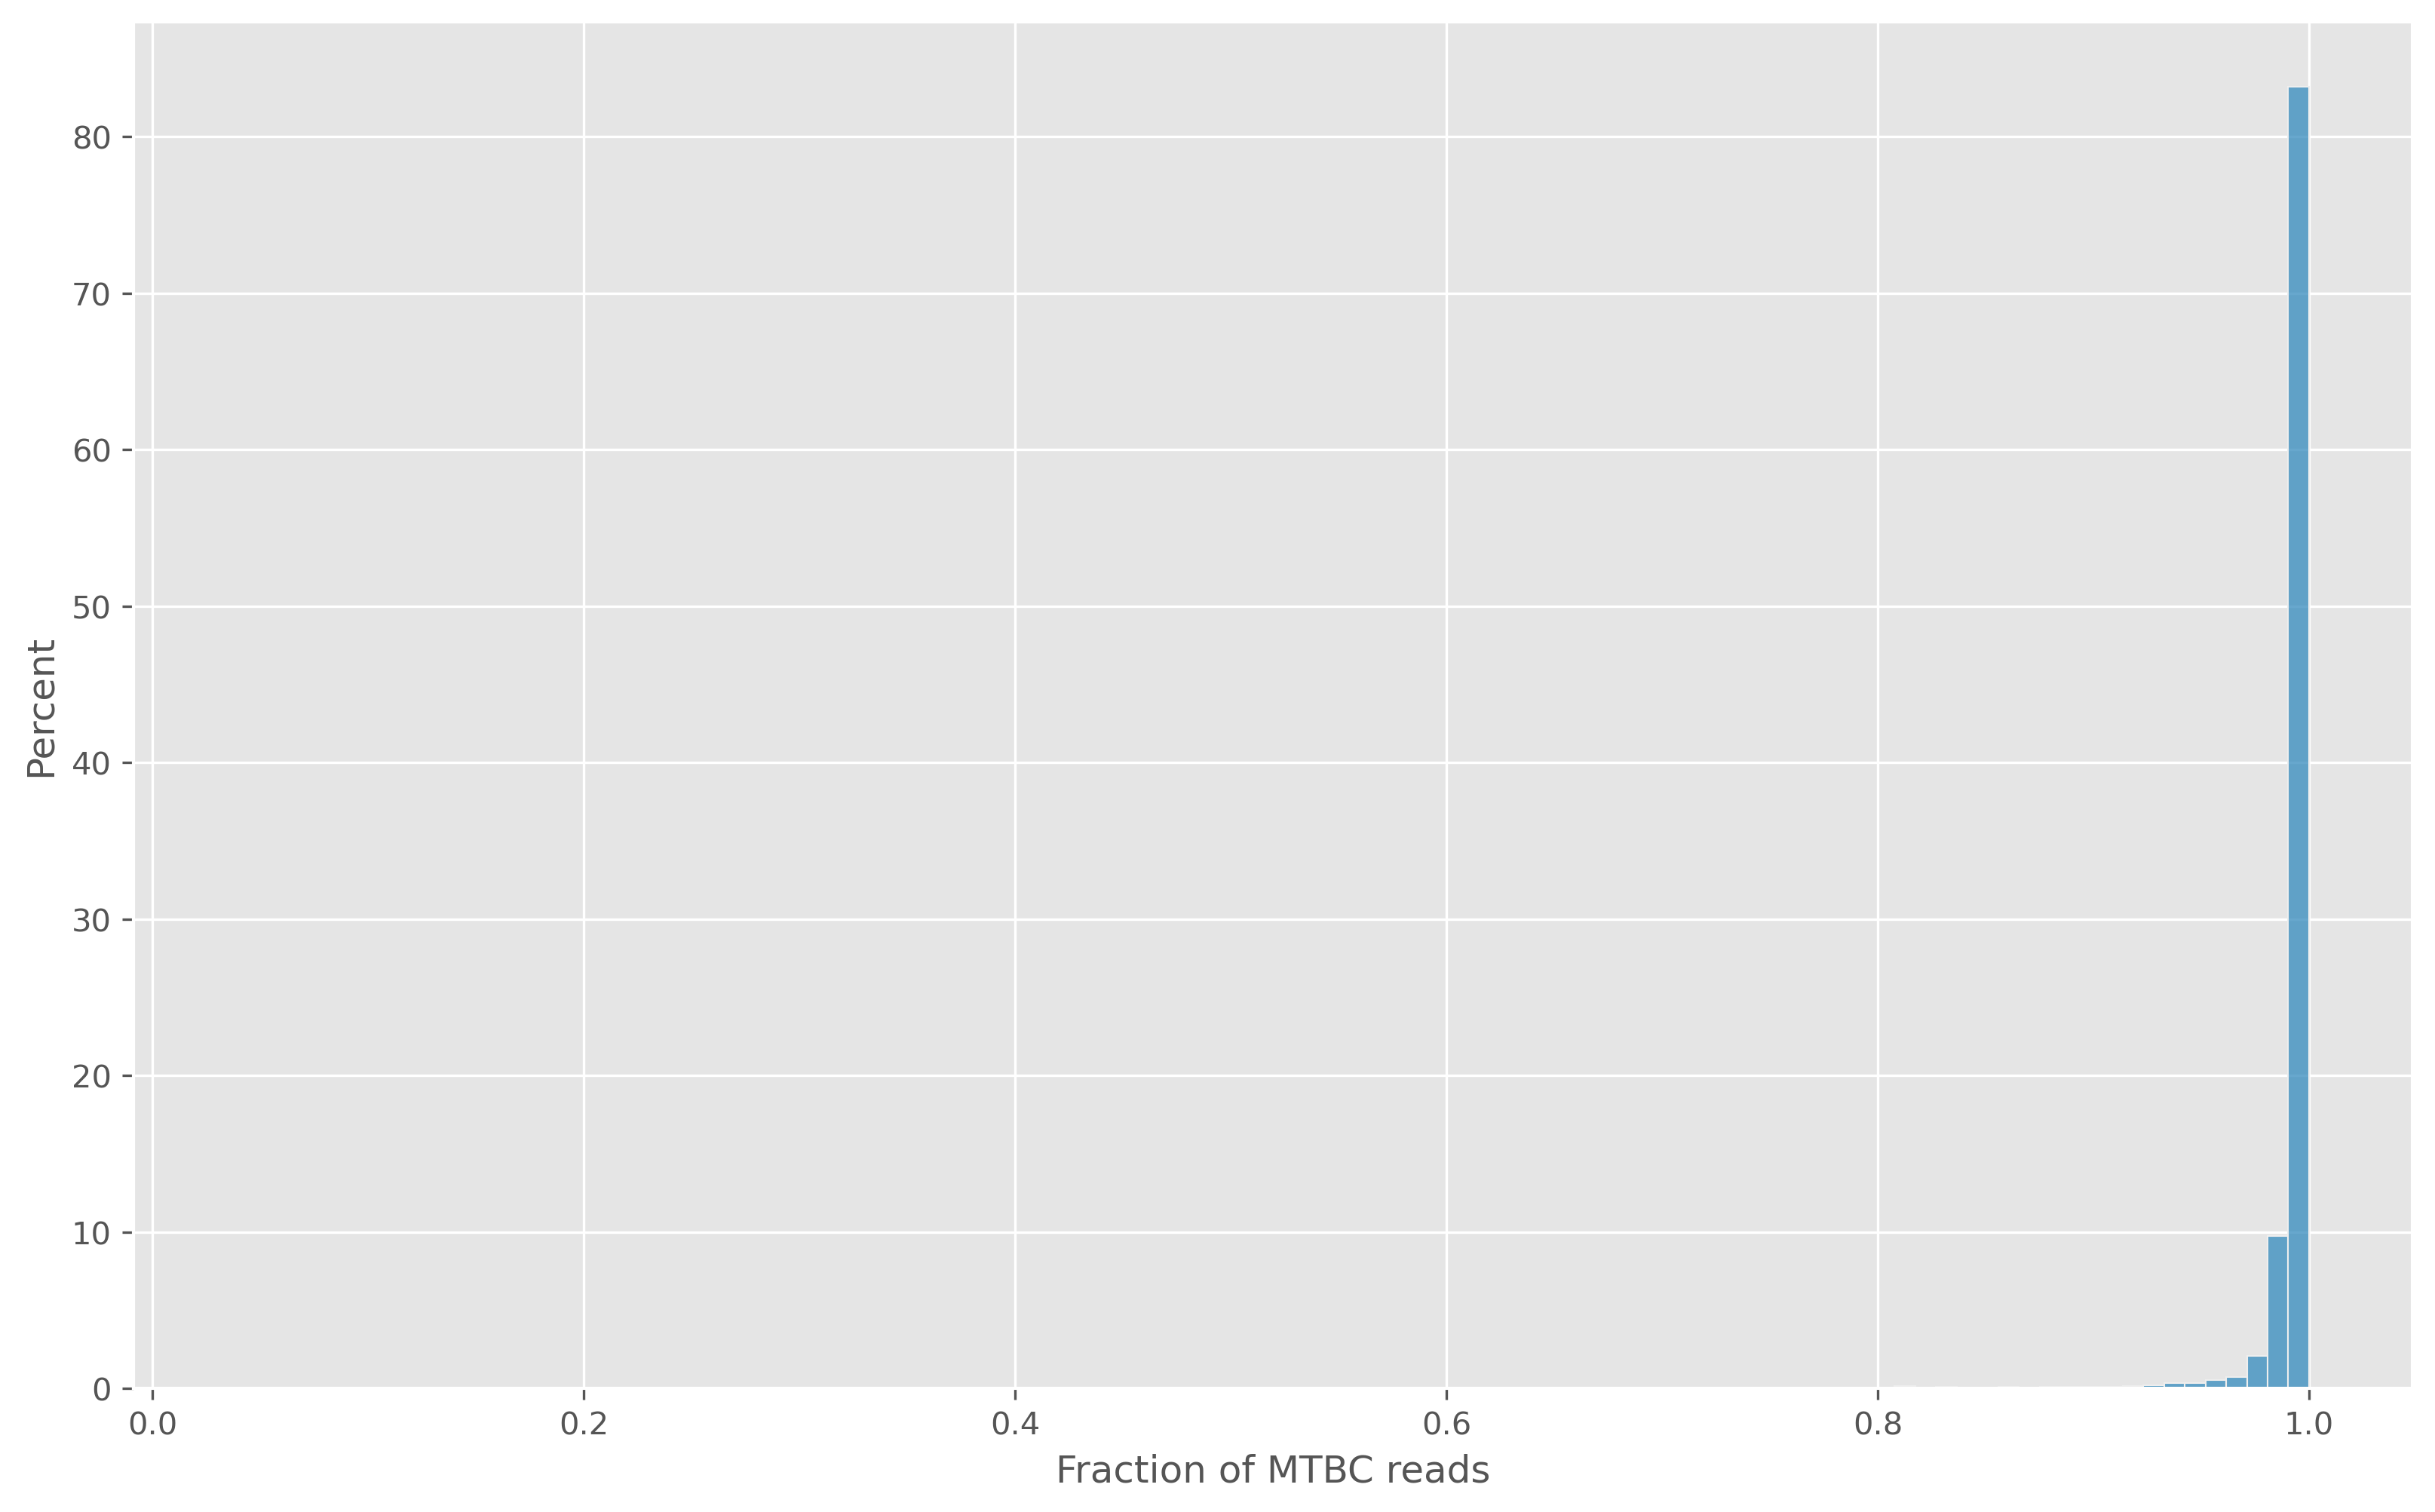

In [67]:
ax = sns.histplot(data=df, x="f_keep", bins=100, stat="percent")
ax.set_xlabel("Fraction of MTBC reads")

Text(0.5, 0, 'Fraction of contaminant reads')

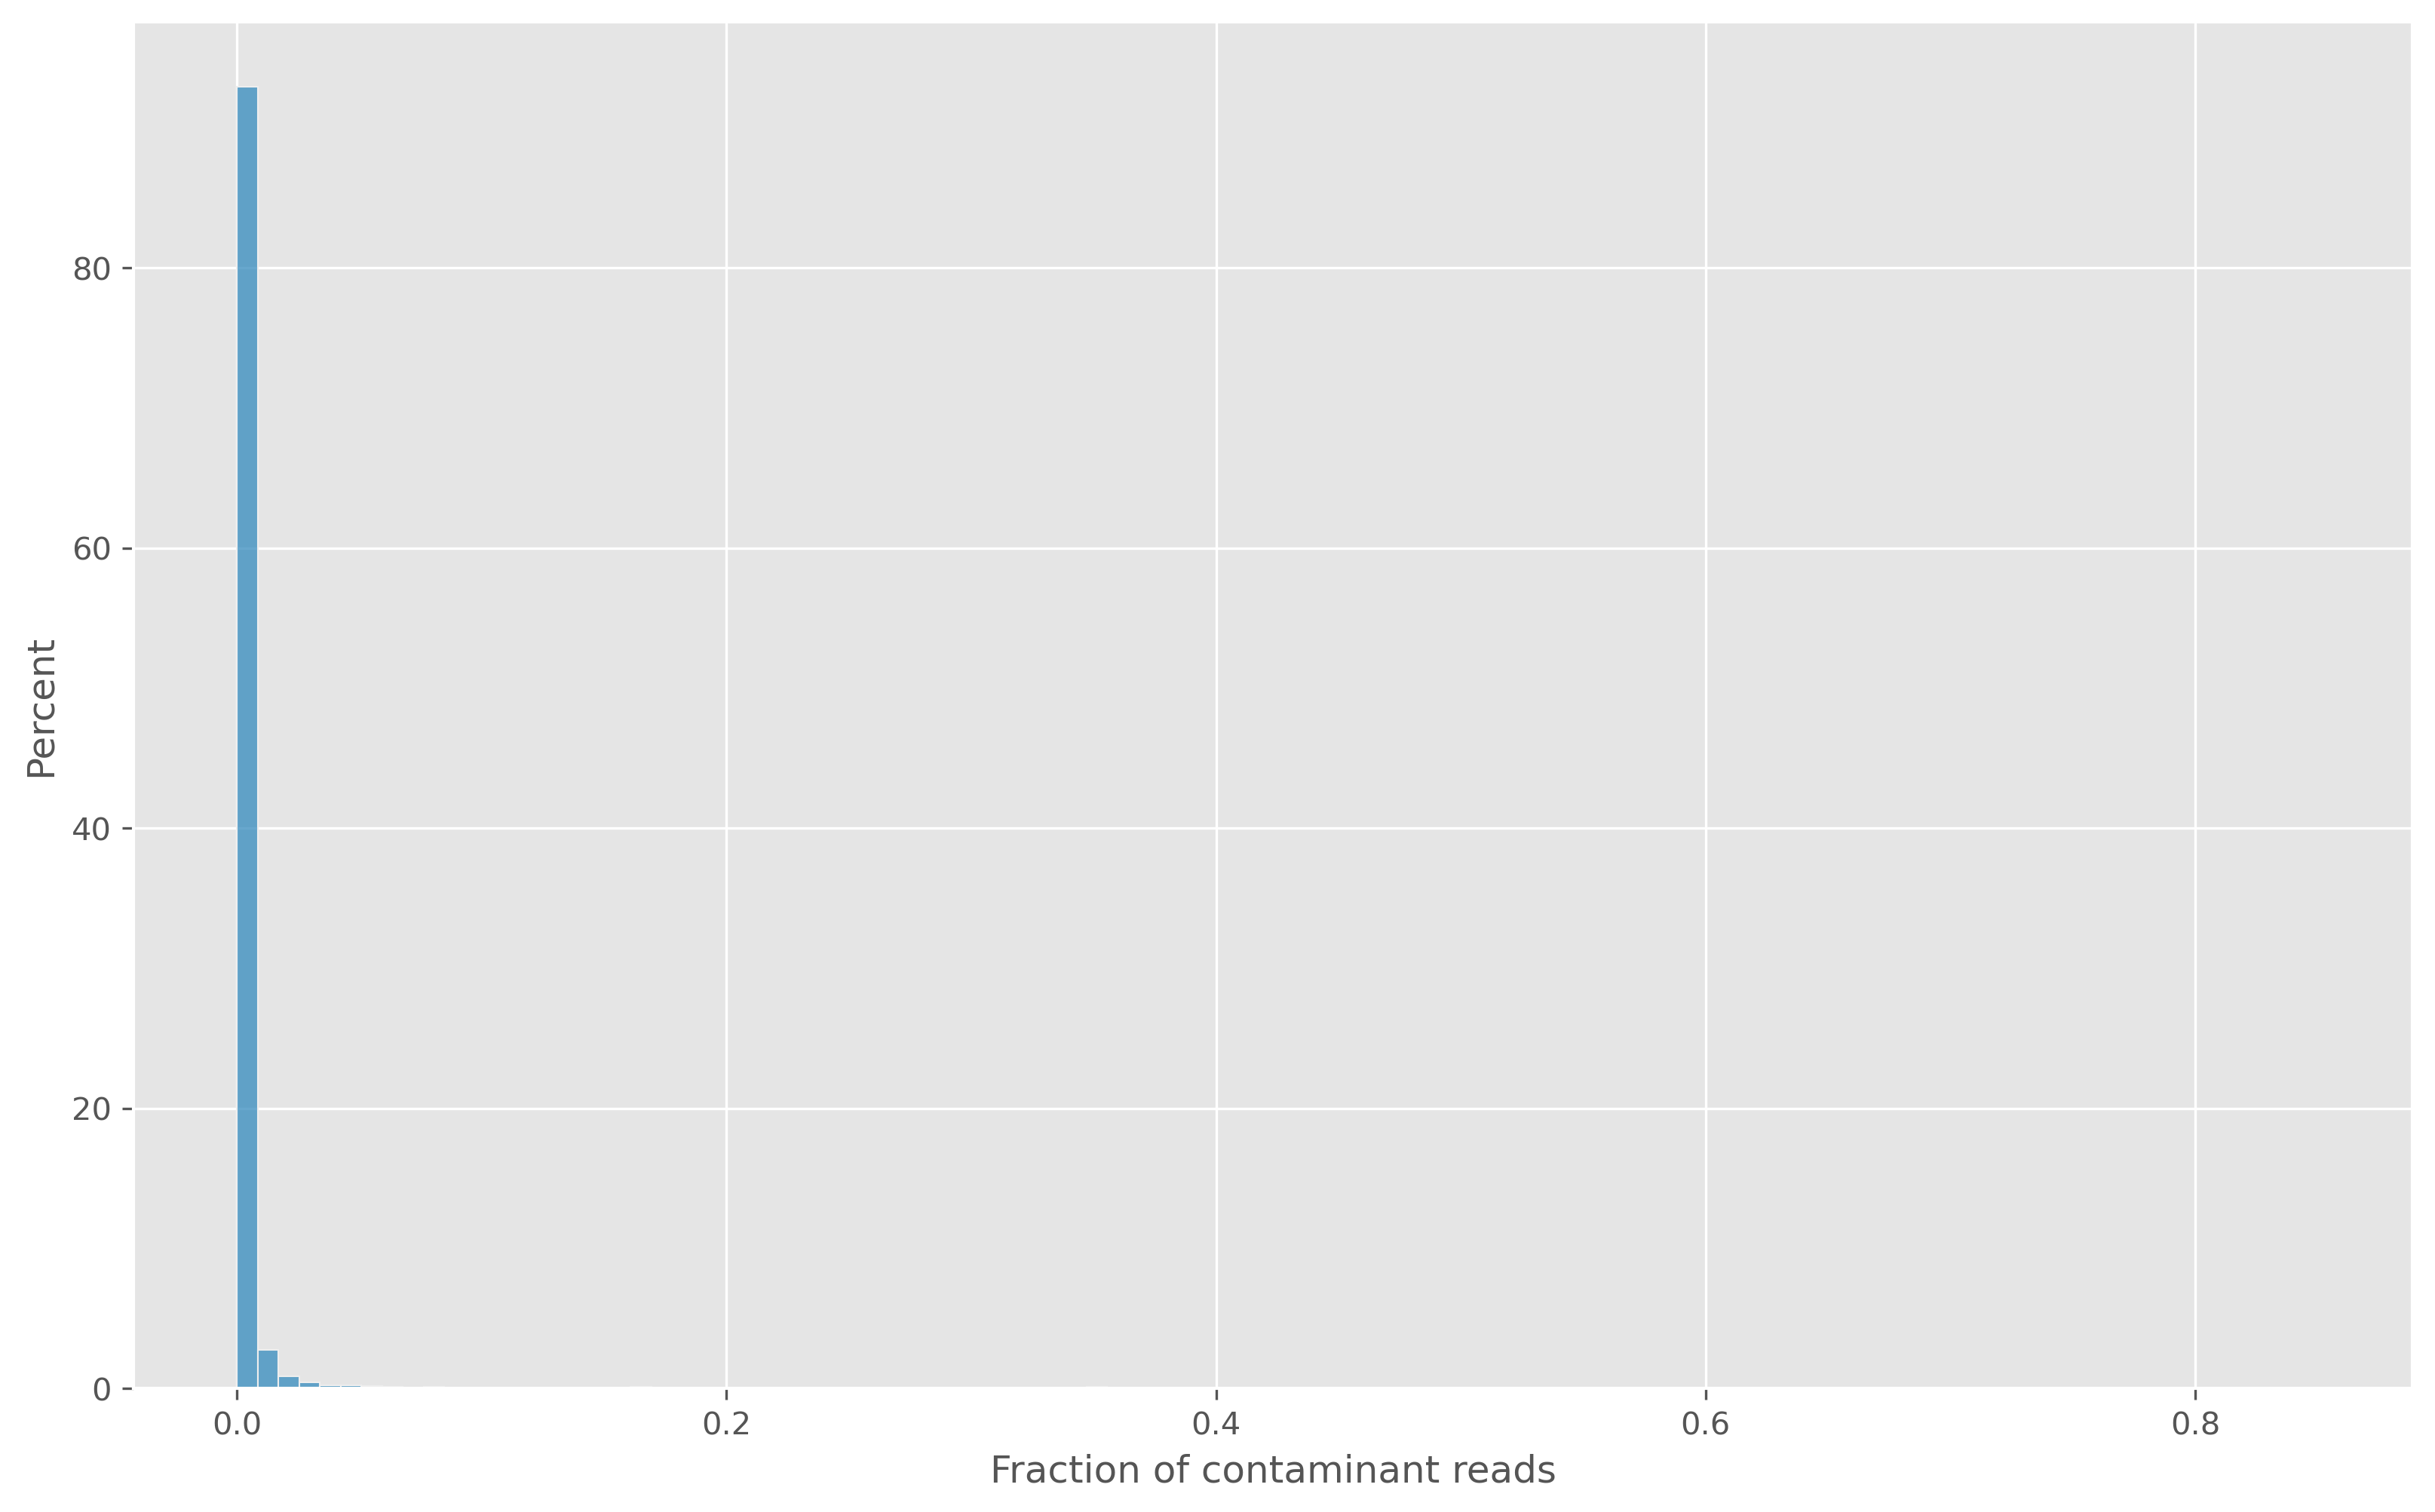

In [66]:
ax = sns.histplot(data=df, x="f_contam", bins=100, stat="percent")
ax.set_xlabel("Fraction of contaminant reads")

Text(0.5, 0, 'Fraction of unmapped reads')

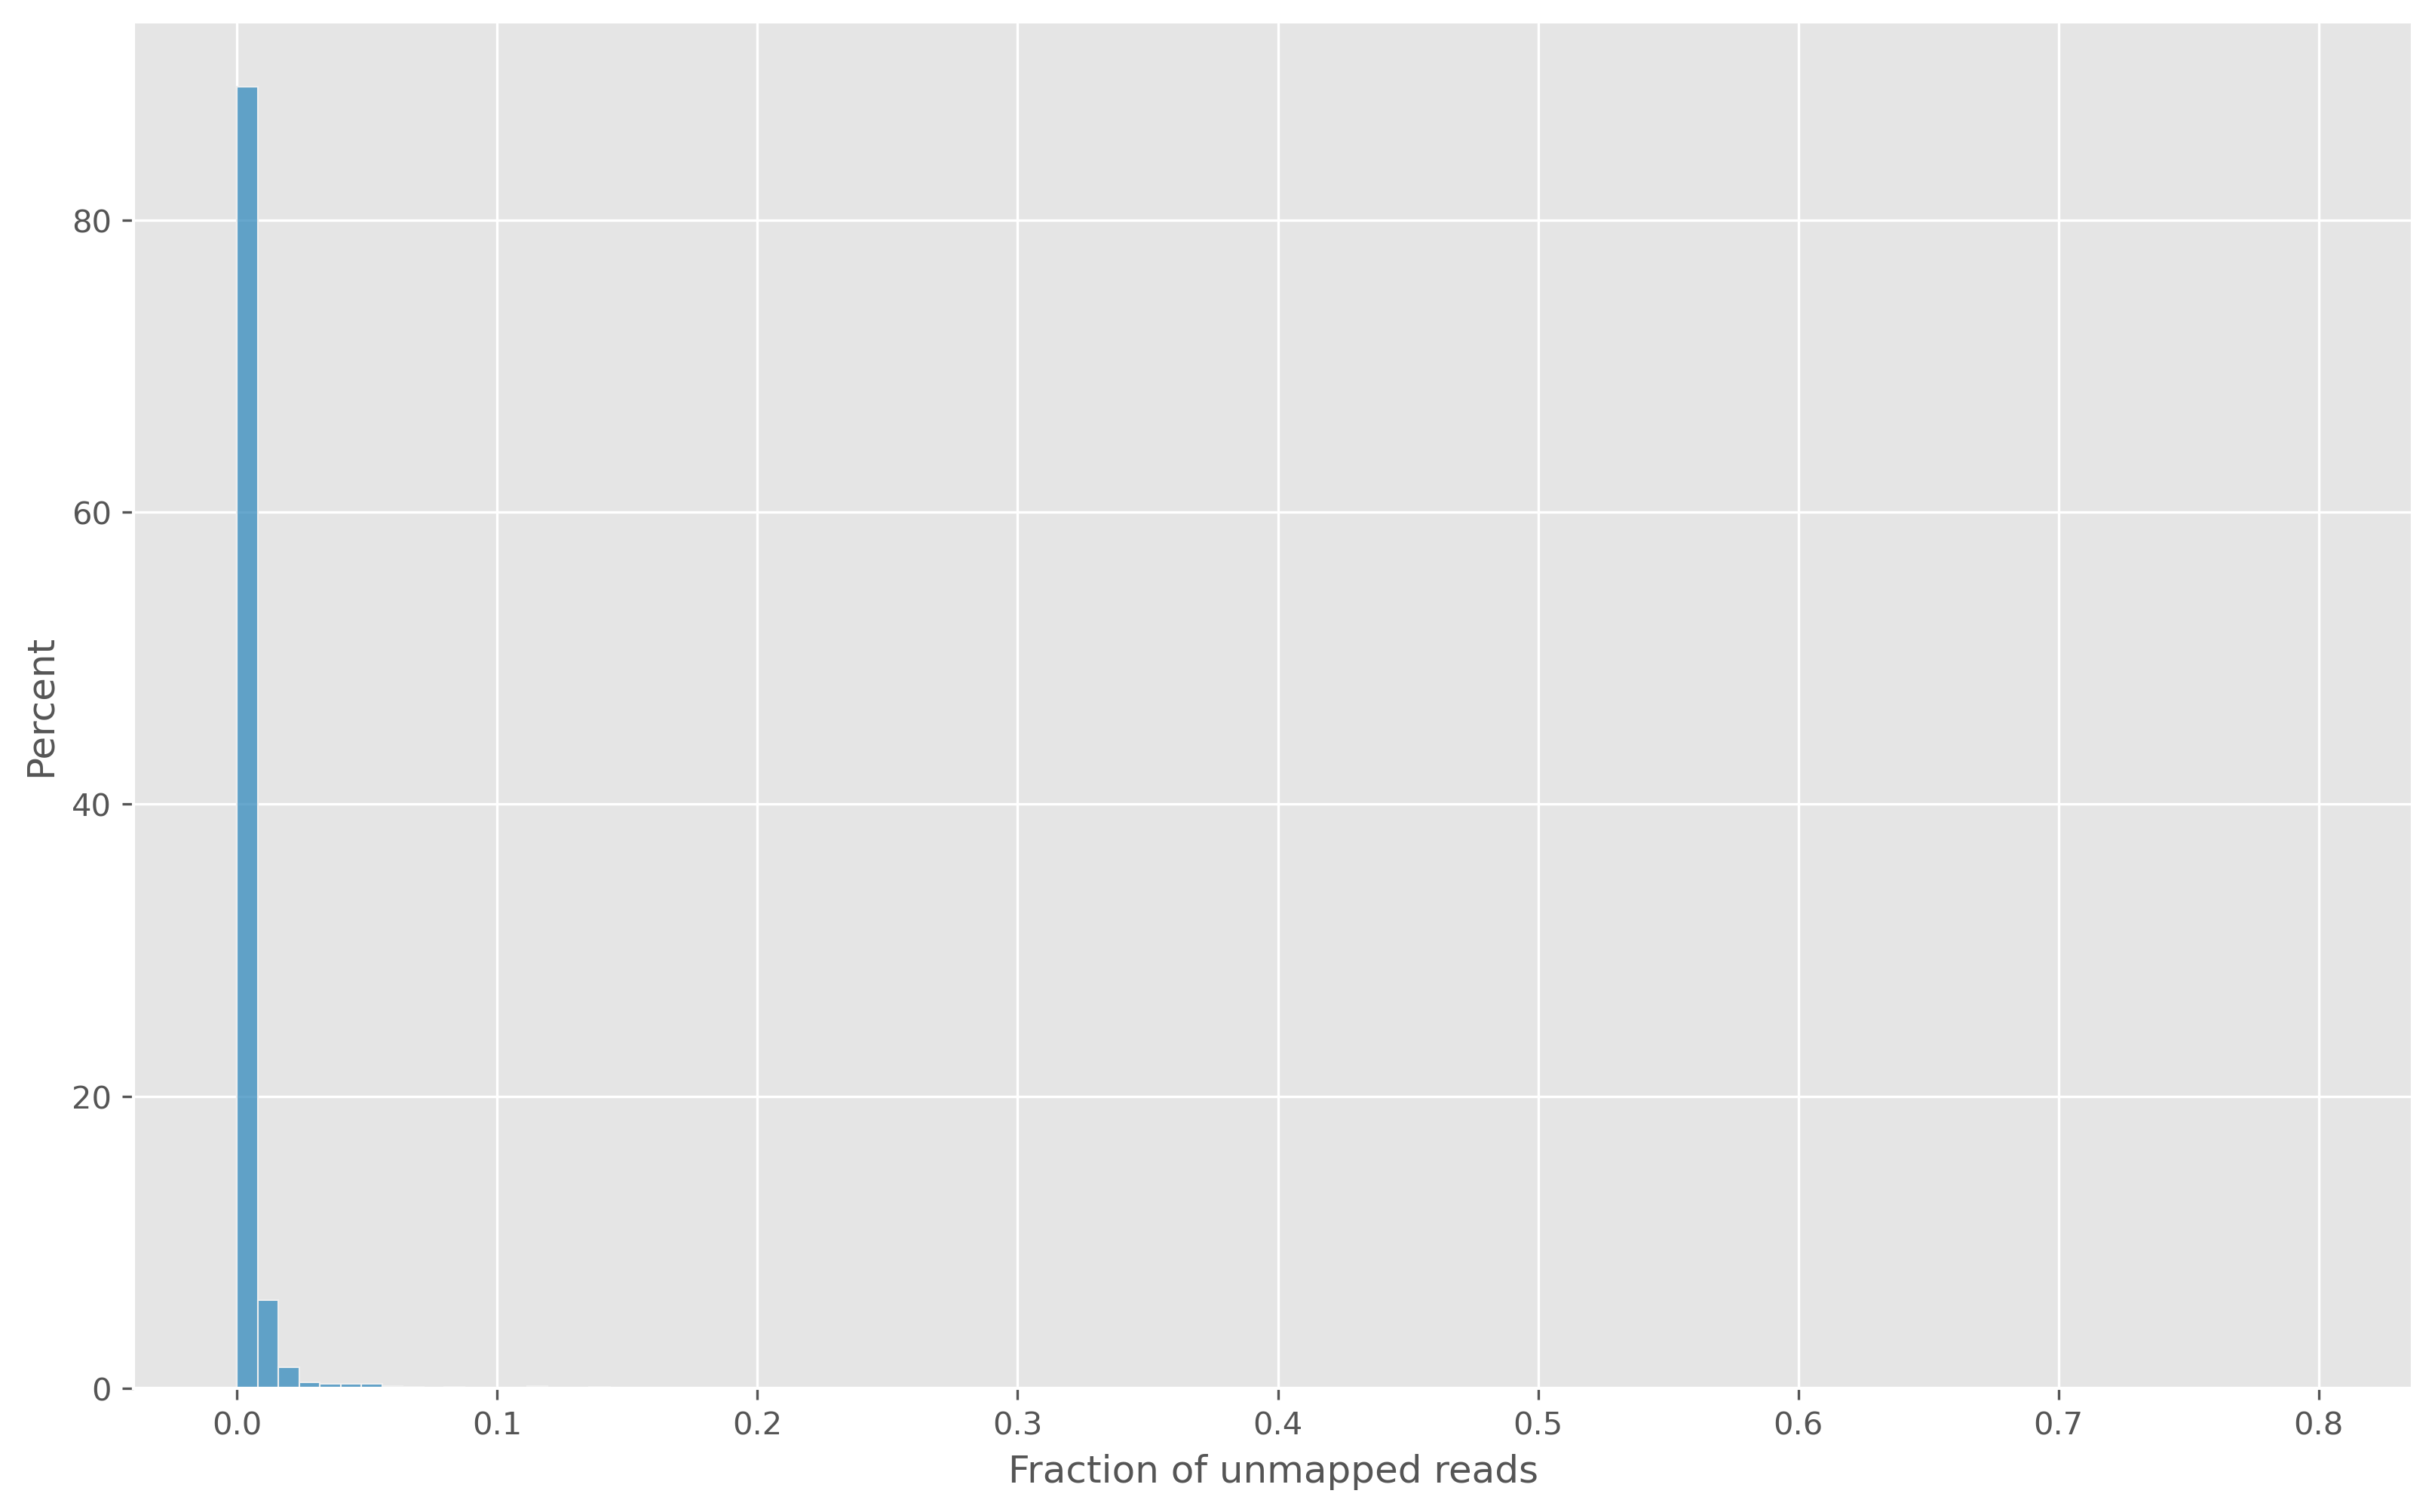

In [68]:
ax = sns.histplot(data=df, x="f_unmapped", bins=100, stat="percent")
ax.set_xlabel("Fraction of unmapped reads")